In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [3]:
df = pd.read_csv('AEP.csv')
df['Date'] = pd.to_datetime(df['Datetime'])
df['year'] = pd.DatetimeIndex(df['Date']).year
df['hour'] = pd.DatetimeIndex(df['Date']).hour

In [4]:
df_18 = df[df['year'] == 2018]
df_18['Days'] = range(len(df_18))

C:\Users\nicoc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [288]:
def mean(X, add = 0):
    return X + add

def squared_exponential(x, xi, l = 2, a = 2):
    rtn = np.exp(-(a*(x - xi))**2/(2*l**2))
    return rtn

def kernel_matrix(X, Xpr):
    j = np.array([squared_exponential(a, b) for a in Xpr['Days'] for b in X['Days']])
    return j.reshape((len(X), len(Xpr)))

def mean_predict(df, hr):
    #df = df[df['Days'] < day]
    correct_hour = df[df['hour'] == hr]
    return np.mean(correct_hour.AEP_MW)

In [289]:
start_index = np.random.uniform() * 365
start_index = int(np.floor(start_index))
X = df_18.iloc[start_index - 24: start_index + 24]
Xpr = df_18.iloc[start_index + 24:start_index + 48]

K_XX = kernel_matrix(X, X)
K_XXpr = kernel_matrix(X, Xpr)
K_XprX = kernel_matrix(Xpr, X)
K_XprXpr = kernel_matrix(Xpr, Xpr)
meanX = np.array([mean_predict(df_18, hr) for hr in X['hour']])
meanXpr = np.array([mean_predict(df_18, hr) for hr in Xpr['hour']])
y = X['AEP_MW']

In [290]:
mu = meanXpr + K_XprX@np.linalg.inv(K_XX)@(y - meanX)
cov =  K_XprXpr - K_XprX@np.linalg.inv(K_XX)@K_XXpr

In [198]:
def mvnrand(μ, Σ, inflation=1e-6):
    x = np.random.multivariate_normal(μ, 1000000*Σ + inflation*np.eye(Σ.shape[0]), 1)
    print(x)
    return x[0]

[[15332.32935631 14017.96575704 14667.05354675 14966.58733256
  14739.83932361 13265.2537588  12276.90707917 13856.80134873
  15100.97188104 15376.92667977 16210.28137448 16245.42095483
  14698.63243125 14884.07794734 16228.04947428 17209.35808615
  16138.64439412 15726.85121027 15588.9023946  15869.33486932
  15666.07181247 15436.82295246 16099.96981813 17201.55910893]]


C:\Users\nicoc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


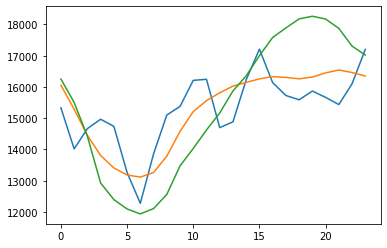

In [291]:
plt.plot(range(24), mvnrand(mu, cov))
plt.plot(range(24), meanXpr)
plt.plot(range(24), Xpr['AEP_MW'])

In [173]:
display(K_XXpr)

array([[5.38018616e-032, 1.91547895e-029, 5.31109225e-027,
        1.14687658e-024, 1.92874985e-022, 2.52616378e-020,
        2.57675711e-018, 2.04697171e-016, 1.26641655e-014,
        6.10193668e-013, 2.28973485e-011, 6.69158609e-010,
        1.52299797e-008, 2.69957850e-007, 3.72665317e-006,
        4.00652974e-005, 3.35462628e-004, 2.18749112e-003,
        1.11089965e-002, 4.39369336e-002, 1.35335283e-001,
        3.24652467e-001, 6.06530660e-001, 8.82496903e-001],
       [1.17691094e-034, 5.38018616e-032, 1.91547895e-029,
        5.31109225e-027, 1.14687658e-024, 1.92874985e-022,
        2.52616378e-020, 2.57675711e-018, 2.04697171e-016,
        1.26641655e-014, 6.10193668e-013, 2.28973485e-011,
        6.69158609e-010, 1.52299797e-008, 2.69957850e-007,
        3.72665317e-006, 4.00652974e-005, 3.35462628e-004,
        2.18749112e-003, 1.11089965e-002, 4.39369336e-002,
        1.35335283e-001, 3.24652467e-001, 6.06530660e-001],
       [2.00500878e-037, 1.17691094e-034, 5.38018616e-